## Data cleaning and Correlation

Aim - Clean the data and find out most correlated features that contribute to movies gross revenue.

In [1]:
#Importing libraries

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,4)


In [2]:
#Importing movies dataset from Kaggle

movies_df = pd.read_csv('movies.csv')

In [3]:
movies_df.shape

(7668, 15)

In [4]:
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#Basic info about datatypes and missing values

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
#Check how many features have missing values

movies_df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
#Percentage of missing values

movies_df.isnull().mean()

name        0.000000
rating      0.010042
genre       0.000000
year        0.000000
released    0.000261
score       0.000391
votes       0.000391
director    0.000000
writer      0.000391
star        0.000130
country     0.000391
budget      0.283125
gross       0.024648
company     0.002217
runtime     0.000522
dtype: float64

In [8]:
#Missing values features

movies_df[movies_df.columns[movies_df.isnull().sum()>0]].head()


,rating,released,score,votes,writer,star,country,budget,gross,company,runtime
0,R,"June 13, 1980 (United States)",8.4,927000.0,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,R,"July 2, 1980 (United States)",5.8,65000.0,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,PG,"June 20, 1980 (United States)",8.7,1200000.0,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,PG,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,R,"July 25, 1980 (United States)",7.3,108000.0,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
#features names having missing values

movies_df.columns[movies_df.isnull().sum()>0]

Index(['rating', 'released', 'score', 'votes', 'writer', 'star', 'country',
       'budget', 'gross', 'company', 'runtime'],
      dtype='object')

### Let's seperate categorical features and numerical features

In [10]:
#cat_features

cat_features = movies_df.select_dtypes(include='object')
cat_features.head()

,name,rating,genre,released,director,writer,star,country,company
0,The Shining,R,Drama,"June 13, 1980 (United States)",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures


In [11]:
#Features names having missing values

cat_features.columns[cat_features.isnull().sum()>0]

Index(['rating', 'released', 'writer', 'star', 'country', 'company'], dtype='object')

In [12]:
#Creating a for loop to fill nan values in each categorical feature with mode.

for col in cat_features:
    cat_features[col].fillna(cat_features[col].mode()[0]  ,inplace=True)

In [13]:
#let's check missing vlaues for categorical features

cat_features.isnull().sum()

name        0
rating      0
genre       0
released    0
director    0
writer      0
star        0
country     0
company     0
dtype: int64

In [14]:
#num_features

num_features = movies_df.select_dtypes(include= np.number)
num_features.head()

,year,score,votes,budget,gross,runtime
0,1980,8.4,927000.0,19000000.0,46998772.0,146.0
1,1980,5.8,65000.0,4500000.0,58853106.0,104.0
2,1980,8.7,1200000.0,18000000.0,538375067.0,124.0
3,1980,7.7,221000.0,3500000.0,83453539.0,88.0
4,1980,7.3,108000.0,6000000.0,39846344.0,98.0


In [15]:
num_features.isnull().sum()

year          0
score         3
votes         3
budget     2171
gross       189
runtime       4
dtype: int64

In [16]:
#Creating a for loop to fill nan values in each numerical feature with median.

for col in num_features:
    num_features[col].fillna(num_features[col].sort_values().median() , inplace=True)

In [17]:
#Let's check missing vlaues for numerical features

num_features.isnull().sum()

year       0
score      0
votes      0
budget     0
gross      0
runtime    0
dtype: int64

### Concatenating cat_features and num_features dataframe

In [18]:
#Now concatenating both dataframes 

final_df = pd.concat([cat_features , num_features] , axis=1)
final_df.head()

,name,rating,genre,released,director,writer,star,country,company,year,score,votes,budget,gross,runtime
0,The Shining,R,Drama,"June 13, 1980 (United States)",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,1980,8.4,927000.0,19000000.0,46998772.0,146.0
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,1980,5.8,65000.0,4500000.0,58853106.0,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,1980,8.7,1200000.0,18000000.0,538375067.0,124.0
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,1980,7.7,221000.0,3500000.0,83453539.0,88.0
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,1980,7.3,108000.0,6000000.0,39846344.0,98.0


### Data Cleaning

#### Changing datatypes

In [19]:
#Changing datatypes

final_df[['budget' , 'votes' ,'gross' , 'runtime']] = final_df[['budget' , 'votes' ,'gross' ,'runtime']].astype(int)

#### splitting released feature into four features i.e. release_month , realese_day, release_year , release_country

In [20]:
final_df['released'].head()

0    June 13, 1980 (United States)
1     July 2, 1980 (United States)
2    June 20, 1980 (United States)
3     July 2, 1980 (United States)
4    July 25, 1980 (United States)
Name: released, dtype: object

#### Replacing (,) with space so that I can split it easily

In [21]:
final_df['released'] = final_df['released'].str.replace(',' ,'')
final_df['released'].head()

0    June 13 1980 (United States)
1     July 2 1980 (United States)
2    June 20 1980 (United States)
3     July 2 1980 (United States)
4    July 25 1980 (United States)
Name: released, dtype: object

In [22]:
final_df['released'] = final_df['released'].str.replace('(' ,'').str.replace(')','')
final_df['released']

C:\Users\DELL\AppData\Local\Temp\ipykernel_8484\898870966.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_df['released'] = final_df['released'].str.replace('(' ,'').str.replace(')','')


0          June 13 1980 United States
1           July 2 1980 United States
2          June 20 1980 United States
3           July 2 1980 United States
4          July 25 1980 United States
                    ...              
7663    October 23 2020 United States
7664    February 7 2020 United States
7665           April 27 2020 Cameroon
7666     October 1 2020 United States
7667     August 19 2020 United States
Name: released, Length: 7668, dtype: object

#### Splitting features through lambda function

In [23]:
final_df[['release_month' ,'release_day' , 'release_year' , 'release_country' ,'release_coun' ,'d' ,'s']] = final_df['released'].str.split(' ' , expand = True)

In [24]:
final_df.head()

,name,rating,genre,released,director,writer,star,country,company,year,...,budget,gross,runtime,release_month,release_day,release_year,release_country,release_coun,d,s
0,The Shining,R,Drama,June 13 1980 United States,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,1980,...,19000000,46998772,146,June,13,1980,United,States,None,None
1,The Blue Lagoon,R,Adventure,July 2 1980 United States,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,1980,...,4500000,58853106,104,July,2,1980,United,States,None,None
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,June 20 1980 United States,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,1980,...,18000000,538375067,124,June,20,1980,United,States,None,None
3,Airplane!,PG,Comedy,July 2 1980 United States,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,1980,...,3500000,83453539,88,July,2,1980,United,States,None,None
4,Caddyshack,R,Comedy,July 25 1980 United States,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,1980,...,6000000,39846344,98,July,25,1980,United,States,None,None


In [25]:
final_df.drop(['d' ,'s'] , axis =1 ,inplace =True)

In [26]:
final_df.head()

,name,rating,genre,released,director,writer,star,country,company,year,score,votes,budget,gross,runtime,release_month,release_day,release_year,release_country,release_coun
0,The Shining,R,Drama,June 13 1980 United States,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,1980,8.4,927000,19000000,46998772,146,June,13,1980,United,States
1,The Blue Lagoon,R,Adventure,July 2 1980 United States,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,1980,5.8,65000,4500000,58853106,104,July,2,1980,United,States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,June 20 1980 United States,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,1980,8.7,1200000,18000000,538375067,124,June,20,1980,United,States
3,Airplane!,PG,Comedy,July 2 1980 United States,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,1980,7.7,221000,3500000,83453539,88,July,2,1980,United,States
4,Caddyshack,R,Comedy,July 25 1980 United States,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,1980,7.3,108000,6000000,39846344,98,July,25,1980,United,States


In [27]:
final_df['runtime'].unique()

array([146, 104, 124,  88,  98,  95, 133, 129, 127, 100, 116, 109, 114,
       103, 134,  89, 111, 102, 219,  96, 132, 115, 131, 117,  92,  97,
        91, 101,  84, 107,  99,  82,  94, 173, 139, 121, 123, 119,  93,
       150,  86,  75, 106, 112, 108,  83, 105, 113,  85, 118, 140, 149,
       110,  87, 126, 195, 125, 122, 155,  90, 167,  78, 120, 191, 188,
       136, 128,  74,  80, 170, 193,  81,  77,  79, 130,  55, 137, 229,
       160, 145, 138, 141, 164, 143, 153, 187, 154, 162, 161, 144,  72,
       185,  76, 163, 157, 135, 357,  69, 168, 171, 142, 175, 181, 158,
       189, 238, 156, 202, 182, 180, 271,  71, 159, 178, 192, 176, 147,
       242, 194, 177, 169, 151, 172, 148,  73, 165, 186, 152, 183, 224,
       210, 179, 201, 366, 166,  63, 196, 209])

In [28]:
final_df['Release_Country'] = final_df['release_country'] + ' ' + final_df['release_coun']

In [29]:
final_df.drop(['release_country' , 'release_coun'] , axis = 1 , inplace=True)

In [30]:
final_df.head()

,name,rating,genre,released,director,writer,star,country,company,year,score,votes,budget,gross,runtime,release_month,release_day,release_year,Release_Country
0,The Shining,R,Drama,June 13 1980 United States,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,1980,8.4,927000,19000000,46998772,146,June,13,1980,United States
1,The Blue Lagoon,R,Adventure,July 2 1980 United States,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,1980,5.8,65000,4500000,58853106,104,July,2,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,June 20 1980 United States,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,1980,8.7,1200000,18000000,538375067,124,June,20,1980,United States
3,Airplane!,PG,Comedy,July 2 1980 United States,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,1980,7.7,221000,3500000,83453539,88,July,2,1980,United States
4,Caddyshack,R,Comedy,July 25 1980 United States,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,1980,7.3,108000,6000000,39846344,98,July,25,1980,United States


In [31]:
final_df.dtypes

name                object
rating              object
genre               object
released            object
director            object
writer              object
star                object
country             object
company             object
year                 int64
score              float64
votes                int32
budget               int32
gross                int32
runtime              int32
release_month       object
release_day         object
release_year        object
Release_Country     object
dtype: object

In [32]:
final_df['release_year'].unique()

array(['1980', '1981', '1984', 'United', '1983', '1982', 'States', None,
       '1987', '1985', '1986', '1988', '1990', '1989', '1992', '2008',
       '1991', '1993', '1999', '2001', '2016', '1997', '1994', '1995',
       '1998', '2019', '1996', '2000', '2014', '2002', '2003', '2005',
       '2004', '2006', '2007', '2010', '2011', '2009', '2013', '2015',
       '2012', 'Australia', '2017', '2018', '2020'], dtype=object)

In [33]:
final_df['release_year'] = final_df['release_year'].replace('United' , np.nan)
final_df['release_year'] = final_df['release_year'].replace('Australia' , np.nan)
final_df['release_year'] = final_df['release_year'].replace('States' , np.nan)

In [34]:
final_df['release_year'].unique()

array(['1980', '1981', '1984', nan, '1983', '1982', None, '1987', '1985',
       '1986', '1988', '1990', '1989', '1992', '2008', '1991', '1993',
       '1999', '2001', '2016', '1997', '1994', '1995', '1998', '2019',
       '1996', '2000', '2014', '2002', '2003', '2005', '2004', '2006',
       '2007', '2010', '2011', '2009', '2013', '2015', '2012', '2017',
       '2018', '2020'], dtype=object)

In [35]:
final_df['release_year'] = final_df['release_year'].fillna(final_df['release_year'].mode()[0])

In [36]:
final_df['release_year'].unique()

array(['1980', '1981', '1984', '2019', '1983', '1982', '1987', '1985',
       '1986', '1988', '1990', '1989', '1992', '2008', '1991', '1993',
       '1999', '2001', '2016', '1997', '1994', '1995', '1998', '1996',
       '2000', '2014', '2002', '2003', '2005', '2004', '2006', '2007',
       '2010', '2011', '2009', '2013', '2015', '2012', '2017', '2018',
       '2020'], dtype=object)

In [37]:
final_df.head()

,name,rating,genre,released,director,writer,star,country,company,year,score,votes,budget,gross,runtime,release_month,release_day,release_year,Release_Country
0,The Shining,R,Drama,June 13 1980 United States,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,1980,8.4,927000,19000000,46998772,146,June,13,1980,United States
1,The Blue Lagoon,R,Adventure,July 2 1980 United States,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,1980,5.8,65000,4500000,58853106,104,July,2,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,June 20 1980 United States,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,1980,8.7,1200000,18000000,538375067,124,June,20,1980,United States
3,Airplane!,PG,Comedy,July 2 1980 United States,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,1980,7.7,221000,3500000,83453539,88,July,2,1980,United States
4,Caddyshack,R,Comedy,July 25 1980 United States,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,1980,7.3,108000,6000000,39846344,98,July,25,1980,United States


In [38]:
final_df.drop(['released' , 'release_day', 'release_month'] , axis = 1 ,inplace=True)

In [39]:
final_df.head()

,name,rating,genre,director,writer,star,country,company,year,score,votes,budget,gross,runtime,release_year,Release_Country
0,The Shining,R,Drama,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,1980,8.4,927000,19000000,46998772,146,1980,United States
1,The Blue Lagoon,R,Adventure,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,1980,5.8,65000,4500000,58853106,104,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,1980,8.7,1200000,18000000,538375067,124,1980,United States
3,Airplane!,PG,Comedy,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,1980,7.7,221000,3500000,83453539,88,1980,United States
4,Caddyshack,R,Comedy,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,1980,7.3,108000,6000000,39846344,98,1980,United States


In [40]:
final_df['release_year'].unique()

array(['1980', '1981', '1984', '2019', '1983', '1982', '1987', '1985',
       '1986', '1988', '1990', '1989', '1992', '2008', '1991', '1993',
       '1999', '2001', '2016', '1997', '1994', '1995', '1998', '1996',
       '2000', '2014', '2002', '2003', '2005', '2004', '2006', '2007',
       '2010', '2011', '2009', '2013', '2015', '2012', '2017', '2018',
       '2020'], dtype=object)

In [41]:
final_df['Release_Country'].unique()

array(['United States', nan, 'Soviet Union', 'South Korea',
       'West Germany', 'United Kingdom', 'Hong Kong', 'South Africa',
       'New Zealand', 'Federal Republic', 'Puerto Rico', 'Czech Republic',
       'United Arab'], dtype=object)

### This is our final dataframe to perform Correlation

In [42]:
final_df.head()

,name,rating,genre,director,writer,star,country,company,year,score,votes,budget,gross,runtime,release_year,Release_Country
0,The Shining,R,Drama,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,1980,8.4,927000,19000000,46998772,146,1980,United States
1,The Blue Lagoon,R,Adventure,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,1980,5.8,65000,4500000,58853106,104,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,1980,8.7,1200000,18000000,538375067,124,1980,United States
3,Airplane!,PG,Comedy,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,1980,7.7,221000,3500000,83453539,88,1980,United States
4,Caddyshack,R,Comedy,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,1980,7.3,108000,6000000,39846344,98,1980,United States


In [43]:
final_df.isnull().sum()

name                 0
rating               0
genre                0
director             0
writer               0
star                 0
country              0
company              0
year                 0
score                0
votes                0
budget               0
gross                0
runtime              0
release_year         0
Release_Country    721
dtype: int64

### Let's perform Most Frequent Imputation on Release_Country

In [44]:
final_df['Release_Country'] = final_df['Release_Country'].fillna(final_df['Release_Country'].mode()[0])

In [45]:
final_df.head()

,name,rating,genre,director,writer,star,country,company,year,score,votes,budget,gross,runtime,release_year,Release_Country
0,The Shining,R,Drama,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,1980,8.4,927000,19000000,46998772,146,1980,United States
1,The Blue Lagoon,R,Adventure,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,1980,5.8,65000,4500000,58853106,104,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,1980,8.7,1200000,18000000,538375067,124,1980,United States
3,Airplane!,PG,Comedy,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,1980,7.7,221000,3500000,83453539,88,1980,United States
4,Caddyshack,R,Comedy,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,1980,7.3,108000,6000000,39846344,98,1980,United States


In [46]:
final_df.isnull().sum()

name               0
rating             0
genre              0
director           0
writer             0
star               0
country            0
company            0
year               0
score              0
votes              0
budget             0
gross              0
runtime            0
release_year       0
Release_Country    0
dtype: int64

#### We have successfully handled all missing values in categorical features as well as in numerical features 

### This is our final dataframe to perform Correlation

In [47]:
final_df.head()

,name,rating,genre,director,writer,star,country,company,year,score,votes,budget,gross,runtime,release_year,Release_Country
0,The Shining,R,Drama,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,1980,8.4,927000,19000000,46998772,146,1980,United States
1,The Blue Lagoon,R,Adventure,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,1980,5.8,65000,4500000,58853106,104,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,1980,8.7,1200000,18000000,538375067,124,1980,United States
3,Airplane!,PG,Comedy,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,1980,7.7,221000,3500000,83453539,88,1980,United States
4,Caddyshack,R,Comedy,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,1980,7.3,108000,6000000,39846344,98,1980,United States


#### By default it's a pearson correlation

In [48]:
#Let' see correlation of numerical features

correlation_matrix = final_df.corr()            

C:\Users\DELL\AppData\Local\Temp\ipykernel_8484\1258490270.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_df.corr()


#### let's visualize this correlation for better readability

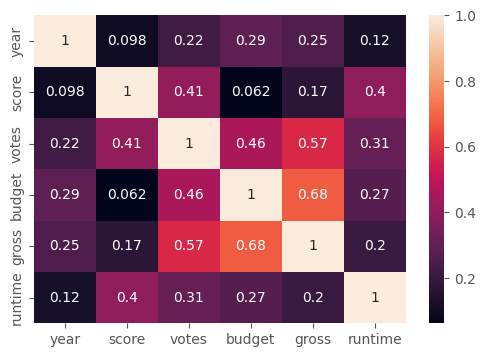

In [50]:
sns.heatmap(correlation_matrix , annot = True )
plt.show()

#### Let's see correlation of categorical variables with gross revenue

#### First we have to convert categorical variables to numerical variables

In [59]:
df_numerized  = final_df

In [63]:
for col in df_numerized.columns:
    if (df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized.head()

,name,rating,genre,director,writer,star,country,company,year,score,votes,budget,gross,runtime,release_year,Release_Country
0,6587,6,6,2589,4014,1047,54,2319,1980,8.4,927000,19000000,46998772,146,0,10
1,5573,6,1,2269,1632,327,55,731,1980,5.8,65000,4500000,58853106,104,0,10
2,5142,4,0,1111,2567,1745,55,1540,1980,8.7,1200000,18000000,538375067,124,0,10
3,286,4,4,1301,2000,2246,55,1812,1980,7.7,221000,3500000,83453539,88,0,10
4,1027,6,4,1054,521,410,55,1777,1980,7.3,108000,6000000,39846344,98,0,10


#### We have converted all the categorical features into numerical features

#### Now let's see top 5 highest grossing movie

In [67]:
df_numerized.sort_values(by = 'gross' ,ascending=False).head()

,name,rating,genre,director,writer,star,country,company,year,score,votes,budget,gross,runtime,release_year,Release_Country
6663,5144,5,0,1125,2550,524,55,1540,2015,7.8,876000,245000000,2069521700,138,35,10
7244,536,5,0,162,743,2241,55,1606,2018,8.4,897000,321000000,2048359754,149,38,10
7480,6194,4,2,1455,1919,676,55,2316,2019,6.9,222000,260000000,1670727580,118,39,10
6653,2969,5,0,517,3568,437,55,2281,2015,7.0,593000,150000000,1670516444,124,35,10
6043,5502,5,0,1517,2314,2241,55,1606,2012,8.0,1300000,220000000,1518815515,143,32,10


#### Now let's see correlation between all the features

#### Find out correlation:

* check which feature is contributed most in gross earning's of movies.
* which is the lowest contributed featture?


In [73]:
correlation_mat = df_numerized.corr()

In [101]:
pd.set_option('display.max_rows', None)                 #We can see all the observation through this function

cross_pairs = correlation_mat.unstack()
cross_pairs      

name             name               1.000000
                 rating            -0.012441
                 genre              0.016355
                 director           0.009079
                 writer             0.010018
                 star               0.006749
                 country           -0.010425
                 company            0.010369
                 year               0.011453
                 score              0.017105
                 votes              0.013056
                 budget             0.020921
                 gross              0.013511
                 runtime            0.010335
                 release_year       0.012000
                 Release_Country    0.011730
rating           name              -0.012441
                 rating             1.000000
                 genre              0.123465
                 director           0.016255
                 writer            -0.002795
                 star               0.005314
          

In [98]:
cross_pairs.sort_values() 

budget           genre             -0.328484
genre            budget            -0.328484
                 gross             -0.228600
gross            genre             -0.228600
rating           budget            -0.148543
budget           rating            -0.148543
genre            votes             -0.145291
votes            genre             -0.145291
country          score             -0.134557
score            country           -0.134557
rating           gross             -0.129925
gross            rating            -0.129925
country          release_year      -0.088531
release_year     country           -0.088531
year             genre             -0.081261
genre            year              -0.081261
company          rating            -0.079626
rating           company           -0.079626
country          runtime           -0.079305
runtime          country           -0.079305
genre            company           -0.070013
company          genre             -0.070013
year      

In [95]:
#Let's sort the values to see high correlation features
sorted_pairs = cross_pairs.sort_values()


#ow we are filtering top features based on their correlation
sorted_pairs[(sorted_pairs)>0.5]

gross            votes              0.573084
votes            gross              0.573084
budget           gross              0.678863
gross            budget             0.678863
year             release_year       0.970458
release_year     year               0.970458
name             name               1.000000
runtime          runtime            1.000000
gross            gross              1.000000
budget           budget             1.000000
votes            votes              1.000000
score            score              1.000000
year             year               1.000000
company          company            1.000000
country          country            1.000000
star             star               1.000000
writer           writer             1.000000
director         director           1.000000
genre            genre              1.000000
rating           rating             1.000000
release_year     release_year       1.000000
Release_Country  Release_Country    1.000000
dtype: flo

#### Observation:
    
* Budget and votes have the highest correlation to gross earnings.
* Company has low correlation.

Note - I thought company will be a good contributer to the gross earnings of the movies but I was wrong.

#### Thank you so much for seeing this project!

Shubham singh